**Basic Information

The dataset contains 12,906 entries.
There are 83 columns, with a mix of numerical and categorical data.

**Many columns have missing values. Missing Values are:

patient_race: 6,385 missing values.

payer_type: 1,803 missing values.

patient_state: 51 missing values.

bmi: 8,965 missing values.

Other columns also have missing values, but these are the most significant ones.

In [4]:
import pandas as pd

%cd /content/drive/MyDrive/ColabNotebooks
data = pd.read_csv('WiDS_Datathon2024_trainingdata.csv')

/content/drive/MyDrive/ColabNotebooks


Summary Statistics (for numerical features)

The dataset includes a range of numerical features.
The mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum values are provided for each numerical column.
Some columns, like bmi, have a significant number of missing values, which might impact statistical analysis.

### Data Distribution and Clustering Analysis

we can visualize the distribution of some key predictor variables and perform clustering analysis. Let's focus on a few columns like patient_age, bmi, and a couple of environmental factors such as Ozone and PM25. We will also attempt a basic clustering analysis to identify patterns in the dataset.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Checking basic info about the dataset
data_info = data.info()

# Summary statistics for numerical features
summary_statistics = data.describe()

# Checking for missing values in the dataset
missing_values = data.isna().sum()

# Displaying the summary information
data_info, summary_statistics, missing_values.head(10)  # Displaying first 10 columns with missing values info

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


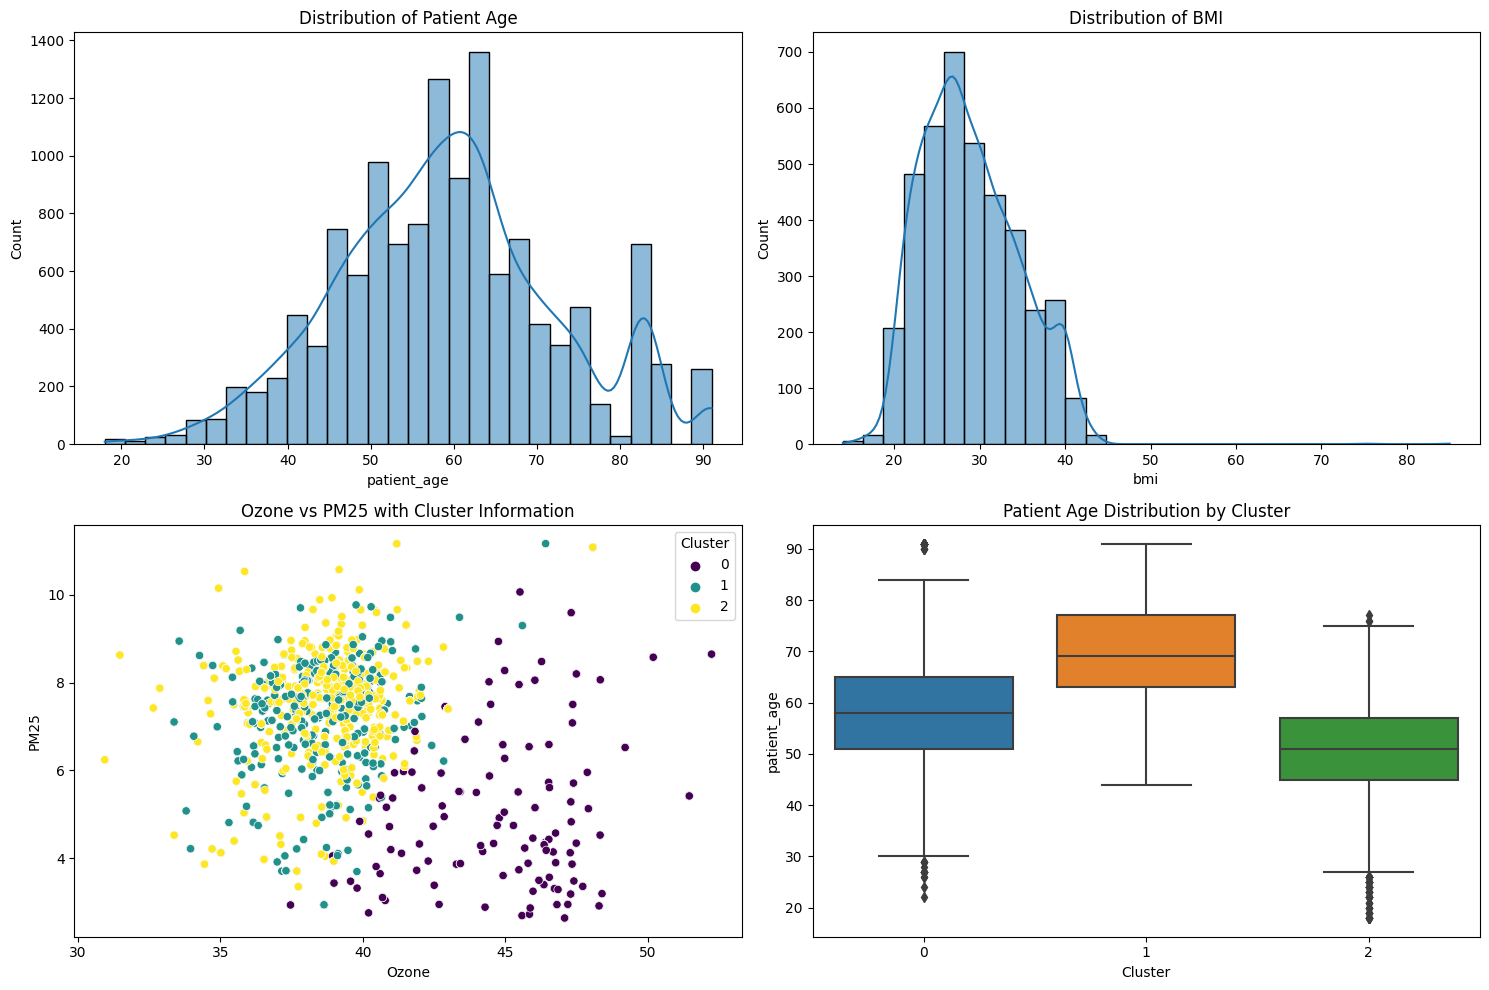

In [6]:
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import numpy as np

# Selecting a subset of columns for clustering
columns_for_clustering = ['patient_age', 'bmi', 'Ozone', 'PM25']
cluster_data = data[columns_for_clustering]

# Handling missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
cluster_data_imputed = imputer.fit_transform(cluster_data)

# Scaling the data
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data_imputed)

# Performing KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(cluster_data_scaled)

# Adding the cluster information to the original data
data['Cluster'] = clusters

# Plotting distributions of some variables and clustering results
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Distribution of patient_age
sns.histplot(data['patient_age'], bins=30, ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Distribution of Patient Age')

# Distribution of bmi
sns.histplot(data['bmi'].dropna(), bins=30, ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Distribution of BMI')

# Scatter plot for Ozone vs PM25 with cluster information
sns.scatterplot(x='Ozone', y='PM25', hue='Cluster', data=data, palette='viridis', ax=axes[1, 0])
axes[1, 0].set_title('Ozone vs PM25 with Cluster Information')

# Box plot for patient_age by Cluster
sns.boxplot(x='Cluster', y='patient_age', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Patient Age Distribution by Cluster')

plt.tight_layout()
plt.show()

### Distributions
1) Patient Age: The distribution of patient age is somewhat skewed towards older ages, indicating a larger number of older patients in the dataset.

2) BMI (Body Mass Index): The distribution of BMI is slightly right-skewed, suggesting a tendency towards higher BMI values among the patients. However, a large number of missing values in the BMI column should be considered when interpreting this result.

### Clustering Analysis
1) Ozone vs PM25: The scatter plot with clustering shows how the dataset can be grouped based on environmental factors such as Ozone and PM25 levels. The clusters indicate groups of patients living in areas with different levels of these environmental factors.

2) Patient Age Distribution by Cluster: The box plot shows the distribution of patient age within each cluster. It appears that the clusters may be capturing some differences in age distributions, although the distinctions are not very pronounced.